## Iris Flower Classification.

This problem was taken from Introduction to Applied Linear Algebra: Vectors, Matrices, and Least Squares. (2018) Stephen Boyd & Lieven Vandenberge. Cambridge University Press

We will reproduce the model from the example found on page 289 of the textbook.

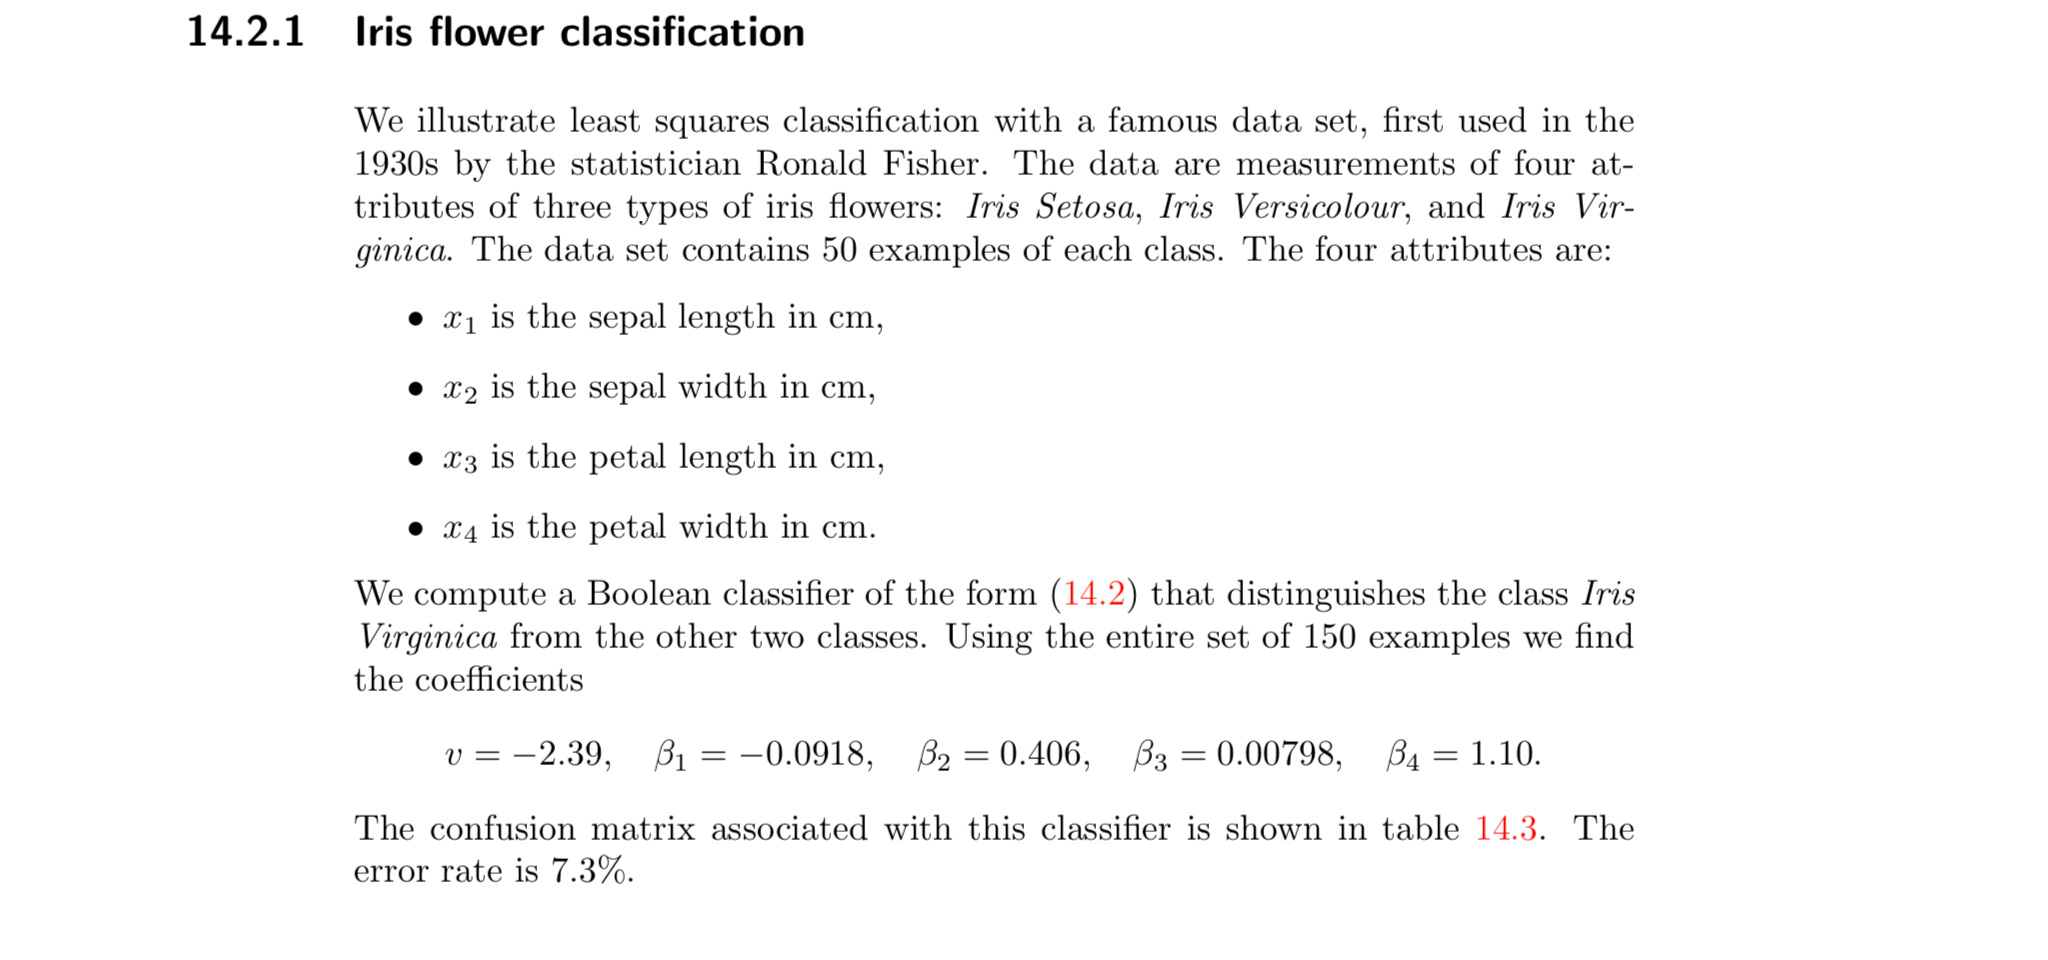


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris_data = datasets.load_iris()

In [2]:
# This will tell us the data categories. Looks like we are dealing with 4-vectors.
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# Next, we will convert the data as is, to a pandas dataframe. This is a matter of
# personal preference. Pandas is a popular library that many people utilize. However,
# it's worth noting that there are various ways to access and analyze the data.

dfIris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

In [4]:
#Executing this cell will print our DataFrame to the screen. Each row is a data point with 
# 4 features. There are a total of 150 irises listed here, each with sepal length and width
# and petal length and width.
dfIris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Lastly, executing this cell will show you the "target" groupings for the iris classification.
#- 0 corresponds to setosa
#- 1 corresponds to versicolor
#- 2 corresponds to virginica

iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
dfIris["Species Classification"] = iris_data.target

In [7]:
irisVirginica = dfIris.loc[dfIris["Species Classification"]>1]

In [8]:
otherTwoIrises = dfIris.loc[dfIris["Species Classification"]<=1]

In [9]:
# First, regroup the Setosa's (class=0) to be lumped in with the Versicolor's
dfIris.loc[dfIris["Species Classification"] == 0, "Species Classification"] = 1


In [10]:
# Now, we change the Setosa-Versicolor group member to have a category
# value of -1 and the Virginica group members to have a category value of 1 (to match boook example)
dfIris.loc[dfIris["Species Classification"] == 1, "Species Classification"] = -1
dfIris.loc[dfIris["Species Classification"] == 2, "Species Classification"] = 1


In [11]:
# Fit a least squares model to the data (categorical data is the response)

from scipy import stats
import statsmodels.api as sm 

# Collect the linear features: sepal length, sepal width, petal length, petal width 
X = np.column_stack((dfIris["sepal length (cm)"],dfIris["sepal width (cm)"],dfIris["petal length (cm)"],dfIris["petal width (cm)"] ))

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

y = dfIris["Species Classification"]

# Fit the ordinary least-squares (OLS) model 
polymodel = sm.OLS(y, X).fit()

# Print estimated parameters 
print(polymodel.params)

const   -2.390564
x1      -0.091752
x2       0.405537
x3       0.007976
x4       1.103559
dtype: float64


In [15]:
# Write a classifier method. This method will loop through the Iris
# data set and classify each flower based on the least squares classifier
# that we found the coefficients for, above.
def classifier(dfIris):

    # Empty to list to store classification results in
    group = []
    
    for i in range(len(dfIris)):
        
        # Each flower will be assigned a value based on least squares model
        flower_value = -2.390564 + -0.091752*dfIris.iloc[i,0]+0.405537*dfIris.iloc[i,1]+0.007976*dfIris.iloc[i,2]+1.103559*dfIris.iloc[i,3]

        # Determine which class each flower belongs to (-1 or 1)
        if flower_value > 0:
            val = 1
            
        else:
            val = -1
            
        group.append(val)
        
    return group
    

In [16]:
groups = classifier(dfIris)

In [17]:
# Determine model accuracy

set_difference = groups - dfIris["Species Classification"]

num_match = set_difference == 0

num_match = np.sum(num_match)

percent_match = num_match/len(dfIris)
 

print("This algorithm correctly matched {}% of the data points.".format(100*percent_match))



This algorithm correctly matched 92.66666666666666% of the data points.


Further exploration: Compute the confusion matrix and see if you get the same results as the textbook.

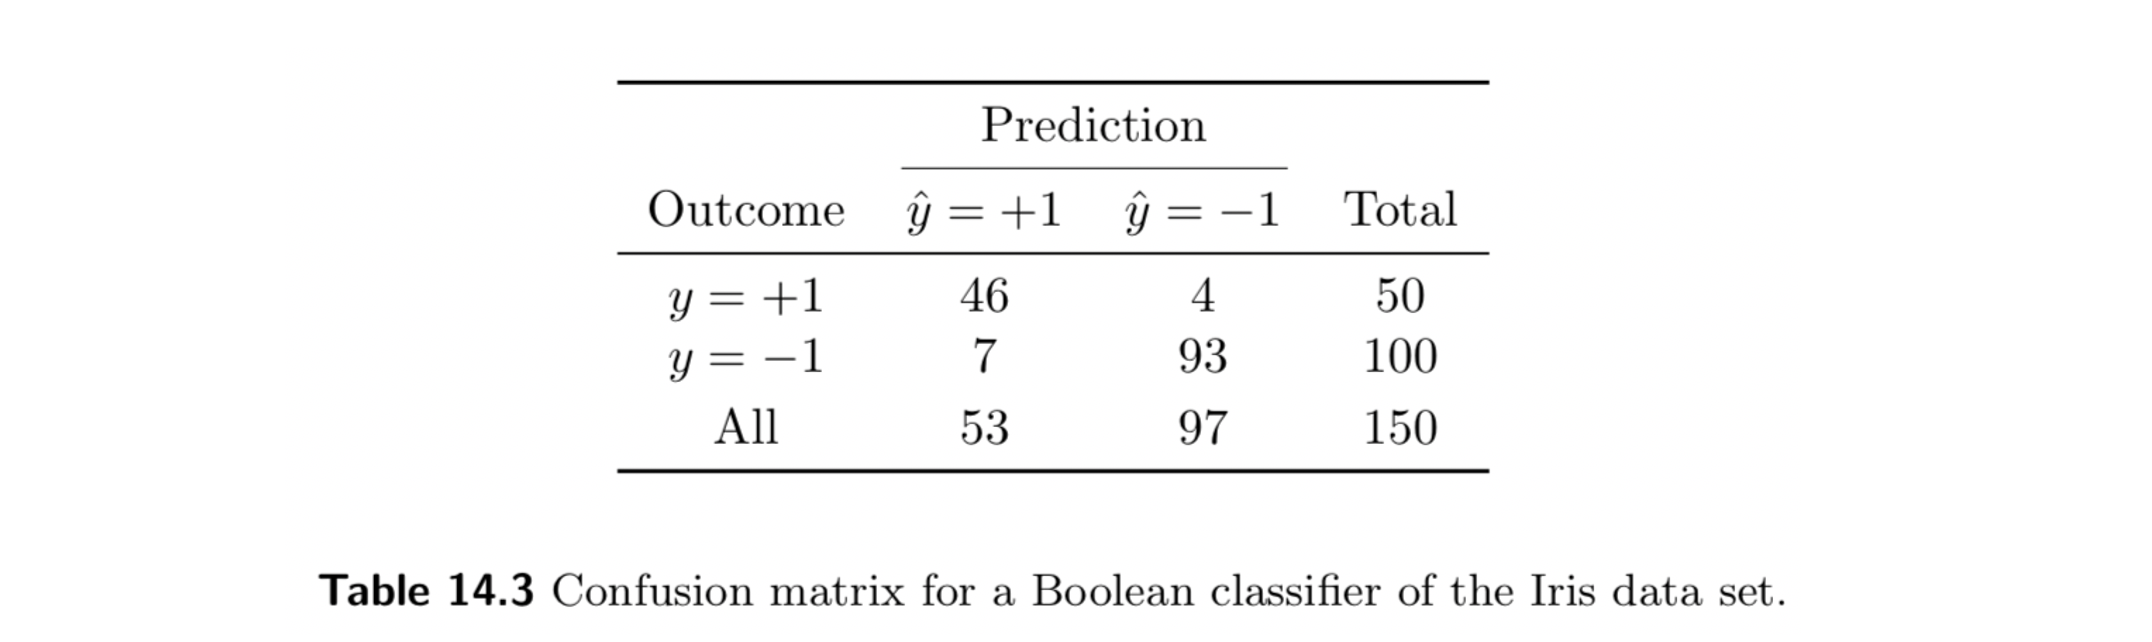